In [10]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter

In [2]:
import pickle 

with open('preprocessing/heart/X.pkl', 'rb') as f:
    X = pickle.load(f)
with open('preprocessing/heart/y.pkl', 'rb') as f:
    y = pickle.load(f)

print('So luong du lieu: ', len(X))
print('So luong nhan: ', len(y))
X[0:5]

So luong du lieu:  270
So luong nhan:  270


,Age,BP,Cholesterol,Max HR,ST depression,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
0,1.712094,-0.075410,1.402212,-1.759208,1.181012,0,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,1.382140,-0.916759,6.093004,0.446409,0.481153,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,0.282294,-0.411950,0.219823,-0.375291,-0.656118,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1.052186,-0.187590,0.258589,-1.932198,-0.743600,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,2.152032,-0.636310,0.374890,-1.240239,-0.743600,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=10)

In [4]:
X_train

,Age,BP,Cholesterol,Max HR,ST depression,Sex_0,Sex_1,Chest pain type_1,Chest pain type_2,Chest pain type_3,...,Slope of ST_1,Slope of ST_2,Slope of ST_3,Number of vessels fluro_0,Number of vessels fluro_1,Number of vessels fluro_2,Number of vessels fluro_3,Thallium_3,Thallium_6,Thallium_7
171,1.602109,0.485490,0.084138,-0.159054,0.831083,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
13,0.722232,0.148950,-0.303530,-0.202302,1.355977,0,1,1,0,0,...,0,1,0,0,0,1,0,1,0,0
129,0.612248,-0.804579,-0.381064,0.446409,0.306188,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
81,-2.137367,-0.636310,-1.001334,-0.851013,0.481153,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
85,-1.367475,0.934210,-0.109696,1.224862,-0.218706,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.722232,-0.075410,1.557280,0.835636,-0.918565,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
235,0.832217,1.607289,-1.660371,-0.202302,4.505343,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
76,-1.037521,-1.533749,-0.807500,-0.072560,1.705907,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
63,0.612248,1.046389,-0.187230,0.922131,-0.131224,1,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0


In [5]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

In [11]:
class KNN:
    def __init__(self, top_k=5):
        self.top_k = top_k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    @staticmethod
    def distance(x1, x2):
        return np.linalg.norm(x1 - x2)

    def predict_batch(self, X):
        y_pred = [self.predict(x) for x in X]
        return y_pred

    def predict(self, x):
        # Compute distance to all points in train set
        distances = [self.distance(x, x_train) for x_train in self.X_train]
        # Sort the distance with index
        top_idx = np.argsort(distances)[:self.top_k]
        # Get top K label
        k_nearests = self.y_train[top_idx]
        # Predict the label
        label = Counter(k_nearests).most_common(1)[0][0]
        
        return label

In [7]:
X_train1 = np.array(X_train)
X_train1

array([[ 1.60210896,  0.48548982,  0.08413848, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.72223219,  0.14895002, -0.30353029, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.61224759, -0.80457941, -0.38106405, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.03752137, -1.53374897, -0.8074997 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.61224759,  1.04638949, -0.18722966, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.16217058,  0.37330989,  0.62687477, ...,  1.        ,
         0.        ,  0.        ]])

100%|██████████| 6/6 [00:02<00:00,  2.91it/s]


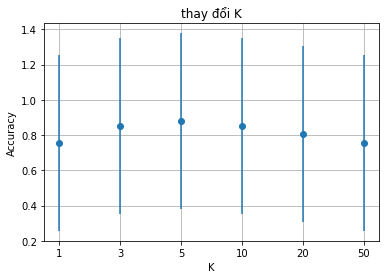

In [13]:
title = "thay đổi K"
xlabel = "K"
X = []
Y = []
error = []

for k in tqdm([1, 3, 5, 10, 20, 50]):
    # Load model
    model = KNN(top_k = k)
    model.fit(np.array(X_train), np.array(y_train))

    # Sample predict model
    y_pred = model.predict_batch(np.array(X_test))

    # Caculate accuracy score
    acc = accuracy_score(y_pred, np.array(y_test))

    X.append(str(k))
    Y.append(acc)
    error.append(0.5)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
# plt.savefig('images/KNN_change_K.png', bbox_inches='tight')
plt.show()

In [14]:
# Test mô hình với K=5, cho độ chính xác cao nhất
model = KNN(top_k = 5)

model.fit(np.array(X_train), np.array(y_train))

# Sample predict model
y_pred = model.predict_batch(np.array(X_test))

# Caculate accuracy score
acc = accuracy_score(y_pred, np.array(y_test))

acc

0.8780487804878049

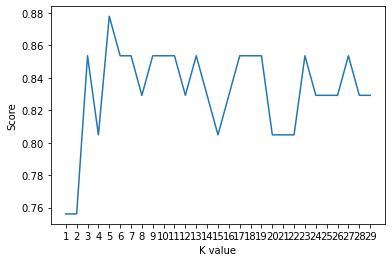

Maximum KNN Score is 87.80%


In [15]:
# try ro find best k value với thư viện KNeighborsClassifier
scoreList = []
for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,30), scoreList)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

KNN: 0.8780487804878049


C:\Users\dovan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


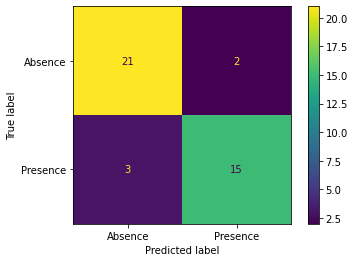

In [16]:
# Test với bộ tham số tốt nhất
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print(f'KNN: {accuracy_score(y_test, knn.predict(X_test))}')
# Hiển thị confusion matrix
plot_confusion_matrix(knn, X_test, y_test)

In [17]:
from sklearn.metrics import precision_score, recall_score
recall_s = recall_score(y_test, knn.predict(X_test), average=None)
print('Tỉ lệ dự đoán đúng người bị bệnh là ', recall_s[1])
print('Tỉ lệ dự đoán đúng người không bị bệnh là', recall_s[0])

Tỉ lệ dự đoán đúng người bị bệnh là  0.8333333333333334
Tỉ lệ dự đoán đúng người không bị bệnh là 0.9130434782608695
